# Flower Image Data - Preprocessing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import glob
import mahotas as mt

# Shape (Hu Moments)

In [2]:
# feature-descriptor-1: Hu Moments
def fd_hu_moments(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    feature = cv2.HuMoments(cv2.moments(image)).flatten()
    
    feature = np.mean(feature)
    return feature

# Haralick Texture

In [3]:
# feature-descriptor-2: Haralick Texture
def fd_haralick(image):
    # convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # compute the haralick texture feature vector
    haralick = mt.features.haralick(gray).mean(axis=0)
    
    # return the result
    haralick = np.mean(haralick)
    return haralick

# Color Histogram

In [4]:
# feature-descriptor-3: Color Histogram
def fd_histogram(image, mask=None):
    chans = cv2.split(image)
    colors = ("b", "g", "r")

    # loop over the image channels
    for (chan, color) in zip(chans, colors):
        hist = cv2.calcHist([chan], [0], None, [256], [0, 256])

    hist = np.mean(hist)
    return hist

# Processing all Images using Haralic Texture

In [5]:
datadir="/home/jithendrasr/Pictures/flower_set/projectNN"
CATEGORIES = [ "bluebell", "daffodil","iris","snow","tigerlily"]

# empty list to hold feature vectors and train labels
train_features = []
train_labels = []
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(datadir, category)   
        
        class_num = CATEGORIES.index(category)    
        for img in os.listdir(path):
            # exception is used to pass broken images.
            try:
                image = cv2.imread(os.path.join(path,img))

                # extract haralick texture from the image
                feature1 = fd_hu_moments(image)
                feature2 = fd_haralick(image)
                feature3 = fd_histogram(image)

                # append the feature vector and label
                training_data.append([[feature1, feature2, feature3], class_num])
                
            except Exception as e:
                pass
            
create_training_data()   

In [6]:
print(training_data)

[[[0.00025566624419840606, 963.9880419992048, 1394.5312], 0], [[0.00023669548523872752, 1182.7524840101385, 1300.7812], 0], [[0.0002958976006923936, 960.1049602447275, 1003.90625], 0], [[0.0002958976006923936, 960.1049602447275, 1003.90625], 0], [[0.00017188466668313952, 961.1433893442075, 1376.9531], 0], [[0.00020550458016063998, 461.10743967429266, 1335.9375], 0], [[0.00018316547590651886, 825.4811564375116, 1017.5781], 0], [[0.0002652230683624893, 424.19291548888367, 976.5586], 0], [[0.00041700044257597587, 1124.5052200219454, 1601.5625], 0], [[0.00018830151673925193, 1430.4278388412329, 1298.8281], 0], [[0.00021237898022142277, 399.939019244774, 1300.7812], 0], [[0.00023669548523872752, 1182.7524840101385, 1300.7812], 0], [[0.00017188466668313952, 961.1433893442075, 1376.9531], 0], [[0.00025191174564021256, 597.7560227204361, 1447.2656], 0], [[0.00023175035972392688, 495.4065946967611, 1466.7969], 0], [[0.00021500601729613673, 1190.8561198554235, 1466.7969], 0], [[0.000197954944547

In [26]:
import random

In [27]:
random.shuffle(training_data)

In [28]:
# to check whether data is randomized. 
for check in training_data[:10]:
    print(check[0])    
    print(check[1])   

[0.0002238808126902865, 1347.7312791045058, 1300.7812]
1
[0.00021087216501899036, 900.3096405723815, 1300.7812]
1
[0.00015267830779628282, 741.5692361048134, 1050.6289]
2
[0.000298788898931015, 1326.548853548076, 1464.8438]
4
[0.0002107885329879237, 2241.2560022015014, 1123.0469]
3
[0.00013723450204689895, 702.0618358477224, 1300.7812]
1
[0.00017537211632738867, 281.18348615418904, 1399.5391]
0
[0.00019077204216384717, 542.446085173983, 1466.7969]
0
[0.00024189321937691236, 1386.543045146633, 1300.7812]
4
[0.00015355729084102178, 586.6701558873028, 1093.75]
2


In [29]:
for features, label in training_data:
    train_features.append(features)
    train_labels.append(label)
    
print(train_features[0])       
print(train_labels[0])

[0.0002693805180677134, 1657.4340369707497, 1300.7812]
4


# Training Flower Data using Decision Tree

In [30]:
import sklearn.tree as tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
import graphviz
import matplotlib.image as mpimg

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(train_features,train_labels,test_size=0.25,random_state=1)

In [32]:
X_train = np.array(X_train).reshape(-1, 3)      
decision_tree_classifier=DecisionTreeClassifier()
dtree = decision_tree_classifier.fit(X_train,y_train)
print(dtree)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [14]:
fn = ["shape","texture","color"]
tn = ["bluebell","daffodil","iris","snow","tigerlily"]

dot = tree.export_graphviz(dtree, out_file=None, feature_names=fn, class_names=tn, filled=True, rounded=True, special_characters=True)
 
graph = graphviz.Source(dot)
graph.format = 'png'
graph.render('decision_tree', view=True)

'decision_tree.png'

In [34]:
X_test = np.array(X_test).reshape(-1, 3)     

decision_tree_classifier.score(X_test,y_test)

0.96

# Testing a sample

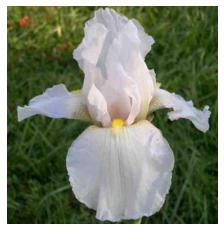

In [45]:
flower = ["bluebell", "daffodil","iris","snow","tigerlily"]
sample = "/home/jithendrasr/Pictures/flower_set/projectNN/iris/iris29.jpg"
image = cv2.imread(sample)

feature1 = fd_hu_moments(image)
feature2 = fd_haralick(image)
feature3 = fd_histogram(image)
fts = [feature1, feature2, feature3]

img = mpimg.imread(sample)
plt.axis("off")
plt.imshow(img)
plt.show()

In [46]:
features = np.array(fts).reshape(-1, 3)         

prediction = dtree.predict(features)
print("Predicted Label :",prediction)
print("Predicted Class :",flower[prediction[0]])

Predicted Label : [2]
Predicted Class : iris
